In [110]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Utilities
import math
import json
import pprint
import itertools
import importlib
import itertools 
from itertools import zip_longest


# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000

set_pandas_display_options()

In [111]:
non_insight = ['Eric is trying to get in shape. He wants to do this by climbing stairs. He starts on the third floor, climbs up five stories, down seven, up six, down three, up four, down four, up five, down three, and then up two again. What floor is he on now?',
'Ben spent $42 for shoes. This was $14 less than what he spent for a shirt and twice more expensive than the tie. The tie was $20 cheaper than the jeans. How much was the jeans?',
'Andrew is twice the age of Brian, Charles is three times older than Brian, and the sum of their ages is 60 years. How old is Charles?',
'Erin had 24 marbles and Evan had 3 marbles. Erin gave some of her marbles to Evan. Now Erin has exactly double the number of marbles that Evan has. How many marbles did Erin give to Evan?',
'Lebrun, Lenoir, and Leblanc are, not necessarily in that order, the accountant, warehouseman, and traveling salesman of a firm. The salesman is unmarried. Both Lebrun and Lenoir are married. Lebrun is not the accountant. What job does Lenoir have? Accountant, warehouseman, or salesman?'];
anagram = ['Solve this anagram: EURADBL', 
						'Solve this anagram: MATCILE', 
						'Solve this anagram: AYKAWLJ',
						'Solve this anagram: LUBMEJD',
						'Solve this anagram: NITGA',]

#take mean increment after excluding the max increment
def return_mean_after_excludeMax(list1):
    lst_sort = [sorted(item) for item in list1]
    for sublist in lst_sort:
        del sublist[-1] #delete the max increment from each list
    
    listofmeans = [np.mean(i) for i in lst_sort] #get mean increment for each list
    return listofmeans

In [112]:
with open('main.json') as json_file:
    data = json.load(json_file)  

In [113]:
questions_non_insight = []
answers_non_insight = [] #whether people typed done or skip
solutions_non_insight = []
difficulty_non_insight = []
aha_non_insight = []
rts_non_insight = []
close_non_insight = []

questions_anagram = []
solutions_anagram = []
answers_anagram = []
difficulty_anagram = []
aha_anagram = []
rts_anagram = []
close_anagram = []

num_subs = 0
for i in range(len(data)): #go thru the subjects
    if len(data[i]['data']) > 3: #only look at subjects that finished the task             
            num_subs = num_subs+1
            k = 4
            
            for j in range(2):
                question = data[i]['data'][0]['problems_seen'][j] #store the question seen by the participant
                answers = []
                rt = 0     
                bad_subject = 0
                close = []
                
                while True:
                    answer = data[i]['data'][k]['responses']
                    answers.append(answer)
                    click = int(data[i]['data'][k]['rt']) #only finish if person typed a response and clicked continue
                    k = k+1
                    close.append(int(data[i]['data'][k]['response']))
                    
                    if (len(answer) > 9 and click < 10000):
                        rt = rt + data[i]['data'][k]['rt']/1000
                        k = k+1
                        break
                    else:
                        rt = rt+10
                        k = k+1
                        
                       
                solution = answer #store people's solution here
                response = data[i]['data'][k]['responses'] #store people's responses to the judgment questions here
                
                k = k+2 #move to the next question
                
                if question in non_insight:   
                    questions_non_insight.append(question)
                    answers_non_insight.append(answers)
                    solutions_non_insight.append(solution)
                    rts_non_insight.append(rt)
                    difficulty_non_insight.append(int(response[6])+1)
                    aha_non_insight.append(int(response[13])+1)
                    close_non_insight.append(close)

                elif question in anagram:
                    questions_anagram.append(question)
                    answers_anagram.append(answers)
                    solutions_anagram.append(solution)
                    rts_anagram.append(rt)
                    difficulty_anagram.append(int(response[6])+1)
                    aha_anagram.append(int(response[13])+1)
                    close_anagram.append(close)

print('we recruited ', num_subs, 'subjects')

we recruited  502 subjects


Convert data into df

In [114]:
d = {'questions':questions_non_insight,
     'answers':answers_non_insight, 
     'solutions': solutions_non_insight,
     'rts': rts_non_insight,
     'difficulty': difficulty_non_insight, 
     'aha': aha_non_insight,
     'close': close_non_insight}

d2 = {'questions':questions_anagram,
     'answers':answers_anagram, 
      'solutions': solutions_anagram,
     'rts': rts_anagram,
     'difficulty': difficulty_anagram, 
     'aha': aha_anagram,
     'close': close_anagram}

df_non_insight = pd.DataFrame(d)
df_anagram = pd.DataFrame(d2)

Filter the data based on some criteria

In [115]:
#correct answers to the problems
solutions1 = 'Accountant|41|eighth|8|8th|eight|30|thirty|six|6|account|warehouse|9|36|11|4|warehouseman|34|18'
solutions2 = 'durable|giant|jaywalk|climate|jumbled'

#analyze only those responses for which people's answer is correct+ 
#remove subjects who solve the task before 7 seconds +
# remove subjects whose last closeness rating was less than 50 (that's it; easy exclusion criteria)
df_non_insight_filtered = df_non_insight.loc[(df_non_insight['solutions'].str.contains(solutions1, case = False)==True)
                                             #& (df_non_insight['close'].str[0] != 100) 
                                             #& (df_non_insight['close'].str.len() > 1)
                                             & (df_non_insight['close'].str[-1] > 80)
                                            ]

df_anagram_filtered = df_anagram.loc[(df_anagram['solutions'].str.contains(solutions2, case = False)==True) 
                                      &(df_anagram['close'].str[0] != 100) 
                                      #&(df_anagram['close'].str.len() > 1)
                                      #&(df_anagram['close'].str[-1] > 90)
                                    ]

print(len(df_non_insight.index), len(df_non_insight_filtered.index))
print(len(df_anagram.index), len(df_anagram_filtered.index))

502 313
502 241


In [116]:
df1 = df_non_insight.groupby(['questions'], as_index=False).agg(['mean', 'count'])
df2 = df_non_insight_filtered.groupby(['questions'], as_index=False).agg(['mean', 'count'])
print(df2.index)
print('% Solved')
print(df2['rts']['count'].values/df1['rts']['count'].values)
print('Solved count')
print(df2['rts']['count'].values)
print('Mean difficulty')
print(df2['difficulty']['mean'].values)
print('Mean RT')
print(df2['rts']['mean'].values)
print('Mean Aha')
print(df2['aha']['mean'].values)

Index(['Andrew is twice the age of Brian, Charles is three times older than Brian, and the sum of their ages is 60 years. How old is Charles?', 'Ben spent $42 for shoes. This was $14 less than what he spent for a shirt and twice more expensive than the tie. The tie was $20 cheaper than the jeans. How much was the jeans?', 'Eric is trying to get in shape. He wants to do this by climbing stairs. He starts on the third floor, climbs up five stories, down seven, up six, down three, up four, down four, up five, down three, and then up two again. What floor is he on now?', 'Erin had 24 marbles and Evan had 3 marbles. Erin gave some of her marbles to Evan. Now Erin has exactly double the number of marbles that Evan has. How many marbles did Erin give to Evan?',
       'Lebrun, Lenoir, and Leblanc are, not necessarily in that order, the accountant, warehouseman, and traveling salesman of a firm. The salesman is unmarried. Both Lebrun and Lenoir are married. Lebrun is not the accountant. What j

In [117]:
df3 = df_anagram.groupby(['questions'], as_index=False).agg(['mean', 'count'])
df4 = df_anagram_filtered.groupby(['questions'], as_index=False).agg(['mean', 'count'])
print(df3.index)
print('% Solved')
print(df4['rts']['count'].values/df3['rts']['count'].values)
print('Solved count')
print(df4['rts']['count'].values)
print('Mean difficulty')
print(df4['difficulty']['mean'].values)
print('Mean RT')
print(df4['rts']['mean'].values)
print('Mean Aha')
print(df4['aha']['mean'].values)

Index(['Solve this anagram: AYKAWLJ', 'Solve this anagram: EURADBL', 'Solve this anagram: LUBMEJD', 'Solve this anagram: MATCILE', 'Solve this anagram: NITGA'], dtype='object', name='questions')
% Solved
[0.5047619  0.49462366 0.56880734 0.5        0.31182796]
Solved count
[53 46 62 51 29]
Mean difficulty
[4.16981132 3.06521739 3.27419355 3.8627451  3.44827586]
Mean RT
[49.87826415 29.18099783 23.42639766 38.88760392 35.92385517]
Mean Aha
[5.24528302 5.39130435 5.17741935 5.39215686 5.62068966]


For the filtered data, get average increment and max increment

mean MAX increment while solving non-insight:  58.60702875399361 20.266015599922394
mean MAX increment while solving anagrams:  73.75103734439834 20.83854773102062
mean increment while solving non-insight:  10.230075286838954 7.416626485674627 313
mean increment while solving anagrams:  9.970994807405596 10.0853524354419 241


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


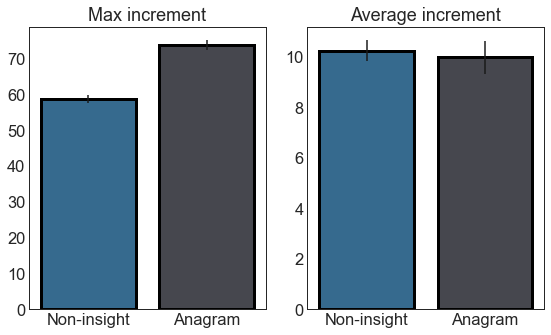

In [118]:
increment_non_insight = []

for i in range(len(df_non_insight_filtered.index)):
    a = df_non_insight_filtered['close'].iloc[i]
    increments = []
    for j in range(len(a)):
            
            if j == 0:
                increments.append(a[j] - 0)
                if(j == len(a)-1):
                        increments.append(a[j] - a[j-1])
                        increment_non_insight.append(increments)
                        break
            
            elif (j < len(a)-1):    
                increments.append(a[j] - a[j-1])
            
            elif(j == len(a)-1): #subject finished the task!
                increments.append(a[j] - a[j-1])
                increment_non_insight.append(increments)
                break

increment_anagram = []

for i in range(len(df_anagram_filtered.index)):
    a = df_anagram_filtered['close'].iloc[i]
    increments = []
    for j in range(len(a)):
        
            if j == 0:
                increments.append(a[j] - 0)
                if(j == len(a)-1): #subject finished the task!
                    increments.append(a[j] - a[j-1])
                    increment_anagram.append(increments)
                    break
            
            elif (j < len(a)-1):    
                increments.append(a[j] - a[j-1])
        
            elif(j == len(a)-1): #subject finished the task!
                increments.append(a[j] - a[j-1])
                increment_anagram.append(increments)
                break
            
#take max increment 
max_values_non_insight = [max(map(int, i)) for i in increment_non_insight]
max_values_anagram = [max(map(int, i)) for i in increment_anagram]
print('mean MAX increment while solving non-insight: ', np.mean(max_values_non_insight), np.std(max_values_non_insight))
print('mean MAX increment while solving anagrams: ', np.mean(max_values_anagram), np.std(max_values_anagram))

#gives an indication of how much progress people make on average..
mean_increments_ni = return_mean_after_excludeMax(increment_non_insight)
print('mean increment while solving non-insight: ', np.mean(mean_increments_ni), np.std(mean_increments_ni), len(mean_increments_ni))

mean_increments_an = return_mean_after_excludeMax(increment_anagram)
print('mean increment while solving anagrams: ', np.mean(mean_increments_an), np.std(mean_increments_an),len(mean_increments_an))

###############################################################################
#Plot it!
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(8,5), 
                                              "grid.linewidth": 1, "axes.linewidth": 1, 'patch.linewidth': 3.0})

color = ['#276d9d', '#45464f']
plt.subplot(1, 2, 1)
ax = sns.barplot(np.arange(2), [np.mean(max_values_non_insight), np.mean(max_values_anagram)]
                 , yerr=[np.std(max_values_non_insight)/np.sqrt(len(max_values_non_insight)), np.std(max_values_anagram)/np.sqrt(len(max_values_anagram))], 
                 palette = color, edgecolor = 'black')
plt.xticks(np.arange(2), ['Non-insight','Anagram'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Max increment')

plt.subplot(1, 2, 2)
ax = sns.barplot(np.arange(2), [np.mean(mean_increments_ni), np.mean(mean_increments_an)]
                 , yerr=[np.std(mean_increments_ni)/np.sqrt(len(mean_increments_ni)), np.std(mean_increments_an)/np.sqrt(len(mean_increments_an))], palette = color, edgecolor = 'black', )
plt.xticks(np.arange(2), ['Non-insight','Anagram'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Average increment')

plt.tight_layout()
#plt.savefig('Increments1.png',dpi=1200)
plt.show()

Mixed model analysis

In [123]:
import statsmodels.api as sm   

mean_increment = mean_increments_ni+mean_increments_an
max_increment = max_values_non_insight + max_values_anagram
ahas = np.concatenate([df_non_insight_filtered['aha'].values,df_anagram_filtered['aha'].values])
diff = np.concatenate([df_non_insight_filtered['difficulty'].values,df_anagram_filtered['difficulty'].values])
rts = np.concatenate([df_non_insight_filtered['rts'].values,df_anagram_filtered['rts'].values])

df_eval = pd.DataFrame({'subject_id': np.array(range(len(ahas))),
    'max_increment': max_increment,
    'mean_increment': mean_increment,
    'aha': ahas,
    'difficulty': diff,
    'rt':  rts})

df_eval["group"] = 1                                                                                                            

vcf = {"subject_id": "0 + C(subject_id)"}                                                         
model = sm.MixedLM.from_formula("aha ~ rt + max_increment", groups="group",                                                    
                                vc_formula=vcf, re_formula="0", data=df_eval)                                                   
result = model.fit()  
result.summary()

#print(stats.pearsonr(max_increment,ahas))
#print(stats.pearsonr(rts,ahas))
#print(stats.pearsonr(diff, ahas))

/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: aha       
No. Observations: 554     Method:             REML      
No. Groups:       1       Scale:              1.7428    
Min. group size:  554     Log-Likelihood:     -1141.8140
Max. group size:  554     Converged:          Yes       
Mean group size:  554.0                                 
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       2.981    0.307 9.724 0.000  2.380  3.582
rt              0.001    0.003 0.397 0.692 -0.004  0.006
max_increment   0.019    0.004 5.091 0.000  0.012  0.026
subject_id Var  1.743                                   
========================================================

"""

Create separate dfs for each non insight question

In [10]:
df1 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("Eric", case=False))]
df2 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("Evan", case=False))]
df3 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("Andrew", case=False))]
df4 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("Ben", case=False))]
df5 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("Lebrun", case=False))]
df6 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("EURADBL", case=False))]
df7 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("MATCILE", case=False))]
df8 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("AYKAWLJ", case=False))]
df9 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("LUBMEJD", case=False))]
df10 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("NITGA", case=False))]

Mean progress for non-insight vs. anagram problems

counts: [  1   2   3   3   3   4   6  12  14  20  28  43  64  94 137 195 256 304
 313 313]
counts: [  1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   3   5
   5   6  10  12  19  23  32  49  67 106 166 274 331]


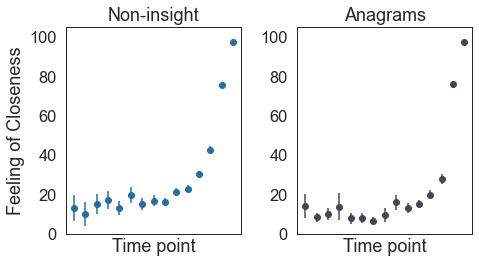

In [11]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(7,4), 
                                              "grid.linewidth": 1, "axes.linewidth": 1,})

frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

a = df_all['close'].values
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)
print('counts: '+str(c))
n = 15 #how many points

x = np.array(range(len(y)))+1
plt.subplot(1, 2, 1)
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='', marker='o', color = '#276d9d')
plt.xticks([])
plt.ylim([0,105])
plt.title('Non-insight')
plt.ylabel('Feeling of Closeness')
plt.xlabel('Time point')

frames = [df6, df7, df8, df9, df10]
df_all2 = pd.concat(frames)
a = df_all2['close'].values
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)

x = np.array(range(len(y)))+1
plt.subplot(1, 2, 2)
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='', marker='o', color = '#45464f')
plt.xticks([])
plt.ylim([0,105])
plt.title('Anagrams')
plt.xlabel('Time point')
print('counts: '+str(c))

plt.tight_layout()
#plt.savefig('Increments2.png',dpi=1200)
plt.show()



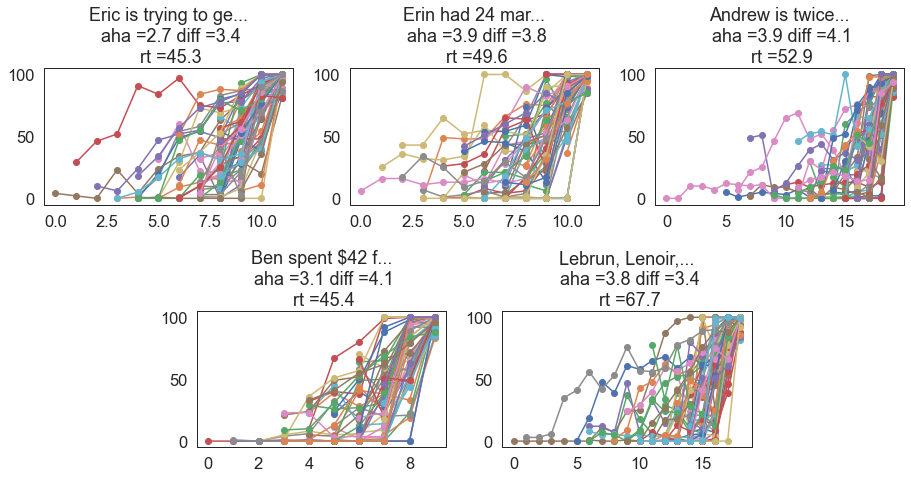

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(13, 7))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    
    if i == 0:
        max_len = max(df1['close'].str.len())
        for j, row in df1.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df1['questions'].iloc[0][0:20]+'...'+'\n aha ='+str(round(df1['aha'].mean(),1))
                 +' diff ='+str(round(df1['difficulty'].mean(),1))+'\n rt ='+str(round(df1['rts'].mean(),1)))
    elif i == 1:
        max_len = max(df2['close'].str.len())
        for j, row in df2.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends
            plt.plot(x2, row['close'], '-o')
        plt.title(df2['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df2['aha'].mean(),1))
                 +' diff ='+str(round(df2['difficulty'].mean(),1))+'\n rt ='+str(round(df2['rts'].mean(),1)))
    elif i == 2:
        max_len = max(df3['close'].str.len())
        for j, row in df3.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends
            plt.plot(x2, row['close'], '-o')
        plt.title(df3['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df3['aha'].mean(),1))
                 +' diff ='+str(round(df3['difficulty'].mean(),1))+'\n rt ='+str(round(df3['rts'].mean(),1)))
        
    elif i == 3:
        max_len = max(df4['close'].str.len())
        for j, row in df4.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends
            plt.plot(x2, row['close'], '-o')
        plt.title(df4['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df4['aha'].mean(),1))
                 +' diff ='+str(round(df4['difficulty'].mean(),1))+'\n rt ='+str(round(df4['rts'].mean(),1)))
    elif i == 4:
        max_len = max(df5['close'].str.len())
        for j, row in df5.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends
            plt.plot(x2, row['close'], '-o')
        plt.title(df5['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df5['aha'].mean(),1))
                 +' diff ='+str(round(df5['difficulty'].mean(),1))+'\n rt ='+str(round(df5['rts'].mean(),1)))
            
plt.tight_layout()
plt.show()

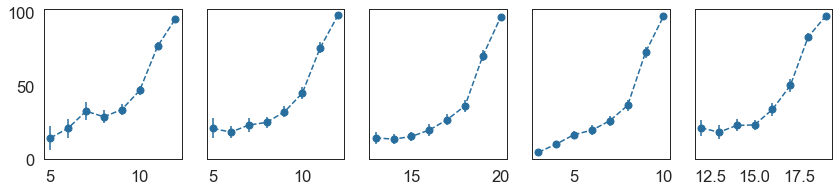

In [77]:

sns.set(style="white", font_scale=1.5, rc={"grid.linewidth": 1, "axes.linewidth": 1,})

fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 10)

n = 8

for i in range(0, 5):
    if i < 5:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    
    if i == 0:
        a = df1['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#276d9d', markersize=7)
        plt.ylim([0,102])
        #plt.title(df1['questions'].iloc[0][0:20]+'...'+'\n aha ='+str(round(df1['aha'].mean(),1))
        #         +' diff ='+str(round(df1['difficulty'].mean(),1))+'\n rt ='+str(round(df1['rts'].mean(),1))
        #         +' count ='+str(len(df1)))
    elif i == 1:
        a = df2['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#276d9d', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df2['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df2['aha'].mean(),1))
        #         +' diff ='+str(round(df2['difficulty'].mean(),1))+'\n rt ='+str(round(df2['rts'].mean(),1))
        #         +' count ='+str(len(df2)))
    elif i == 2:
        a = df3['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#276d9d', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df3['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df3['aha'].mean(),1))
        #         +' diff ='+str(round(df3['difficulty'].mean(),1))+'\n rt ='+str(round(df3['rts'].mean(),1))
        #         +' count ='+str(len(df3)))
        
    elif i == 3:
        a = df4['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#276d9d', markersize=7)
        plt.ylim([-5,102])
        plt.yticks([])
        #plt.title(df4['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df4['aha'].mean(),1))
        #         +' diff ='+str(round(df4['difficulty'].mean(),1))+'\n rt ='+str(round(df4['rts'].mean(),1))
        #         +' count ='+str(len(df4)))
    elif i == 4:
        a = df5['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#276d9d', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df5['questions'].iloc[0][0:15]+'...'+'\n aha ='+str(round(df5['aha'].mean(),1))
        #         +' diff ='+str(round(df5['difficulty'].mean(),1))+'\n rt ='+str(round(df5['rts'].mean(),1))
        #         +' count ='+str(len(df5)))
            
plt.tight_layout()
plt.savefig('non_insight_individual.png',dpi=1200)
plt.show()

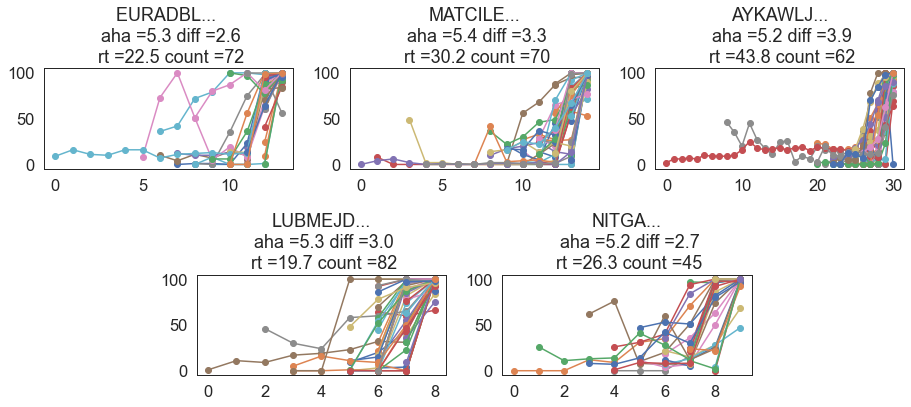

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(13, 6))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    
    if i == 0:
        max_len = max(df6['close'].str.len())
        for j, row in df6.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df6['questions'].iloc[0][20:30]+'... \n'+' aha ='+str(round(df6['aha'].mean(),1))
                 +' diff ='+str(round(df6['difficulty'].mean(),1))+'\n rt ='+str(round(df6['rts'].mean(),1))
                 +' count ='+str(len(df6)))
    elif i == 1:
        max_len = max(df7['close'].str.len())
        for j, row in df7.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df7['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df7['aha'].mean(),1))
                 +' diff ='+str(round(df7['difficulty'].mean(),1))+'\n rt ='+str(round(df7['rts'].mean(),1))
                 +' count ='+str(len(df7)))
    elif i == 2:
        max_len = max(df8['close'].str.len())
        for j, row in df8.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df8['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df8['aha'].mean(),1))
                 +' diff ='+str(round(df8['difficulty'].mean(),1))+'\n rt ='+str(round(df8['rts'].mean(),1))
                 +' count ='+str(len(df8)))
    elif i == 3:
        max_len = max(df9['close'].str.len())
        for j, row in df9.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df9['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df9['aha'].mean(),1))
                 +' diff ='+str(round(df9['difficulty'].mean(),1))+'\n rt ='+str(round(df9['rts'].mean(),1))
                 +' count ='+str(len(df9)))
    elif i == 4:
        max_len = max(df10['close'].str.len())
        for j, row in df10.iterrows():
            x = list(range(0, len(row['close'])))
            x2 = [(max_len-len(x))+i for i in x] #align the ends in the plot
            plt.plot(x2, row['close'], '-o')
        plt.title(df10['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df10['aha'].mean(),1))
                 +' diff ='+str(round(df10['difficulty'].mean(),1))+'\n rt ='+str(round(df10['rts'].mean(),1))
                 +' count ='+str(len(df10)))
            
plt.tight_layout()
plt.show()

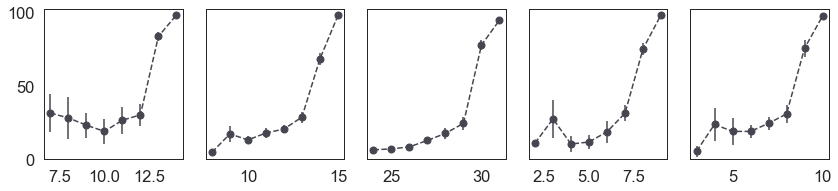

In [78]:
sns.set(style="white", font_scale=1.5, rc={"grid.linewidth": 1, "axes.linewidth": 1,})

fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 10)

n = 8

for i in range(0, 5):
    if i < 5:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    
    if i == 0:
        a = df6['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#45464f', markersize=7)
        plt.ylim([0,102])
        #plt.title(df6['questions'].iloc[0][20:30]+'... \n'+' aha ='+str(round(df6['aha'].mean(),1))
        #         +' diff ='+str(round(df6['difficulty'].mean(),1))+'\n rt ='+str(round(df6['rts'].mean(),1))
        #         +' count ='+str(len(df6)))
    elif i == 1:
        a = df7['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#45464f', markersize=7)
        plt.ylim([-5,102])
        plt.yticks([])
        #plt.title(df7['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df7['aha'].mean(),1))
        #         +' diff ='+str(round(df7['difficulty'].mean(),1))+'\n rt ='+str(round(df7['rts'].mean(),1))
        #         +' count ='+str(len(df7)))
    elif i == 2:
        a = df8['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#45464f', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df8['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df8['aha'].mean(),1))
        #         +' diff ='+str(round(df8['difficulty'].mean(),1))+'\n rt ='+str(round(df8['rts'].mean(),1))
        #         +' count ='+str(len(df8)))
    elif i == 3:
        a = df9['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o',color = '#45464f', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df9['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df9['aha'].mean(),1))
        #         +' diff ='+str(round(df9['difficulty'].mean(),1))+'\n rt ='+str(round(df9['rts'].mean(),1))
        #         +' count ='+str(len(df9)))
    elif i == 4:
        a = df10['close'].values
        m = [li[::-1] for li in a]
        l = [np.array(xi) for xi in m]
        df_1 = pd.DataFrame(l)
        y = np.flip(df_1.mean(0).values)
        e = np.flip(df_1.sem(0,ddof=0).values)

        x = np.array(range(len(y)))+1
        plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o', color = '#45464f', markersize=7)
        plt.ylim([0,102])
        plt.yticks([])
        #plt.title(df10['questions'].iloc[0][20:30]+'...'+'\n aha ='+str(round(df10['aha'].mean(),1))
        #         +' diff ='+str(round(df10['difficulty'].mean(),1))+'\n rt ='+str(round(df10['rts'].mean(),1))
        #         +' count ='+str(len(df10)))
            
plt.tight_layout()
plt.savefig('anagram_individual.png',dpi=1200)
plt.show()

41

In [56]:
print(df_anagram_filtered['aha'].mean(), df_non_insight_filtered['aha'].mean())
print(df_anagram_filtered['difficulty'].mean(), df_non_insight_filtered['difficulty'].mean())

5.270516717325228 3.4335664335664338
3.094224924012158 3.8181818181818183


In [180]:
a = df1['close'].values
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = df_1.mean(0).values
e = df_1.std(0,ddof=0).values



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[1, 2, 3, 4, 5]
[1 2 3 4 5]
